In [3]:
import pandas as pd

data = pd.read_csv('data.csv')
print(data.head())

print (data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

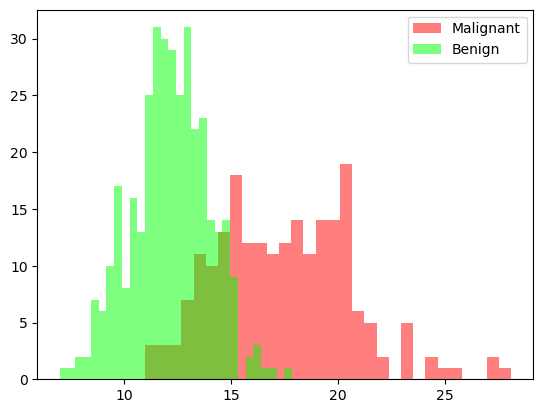

Most frequent malignant radius mean is:  20.101999999999997


In [8]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean, bins=30, fc=(1, 0, 0, 0.5), label="Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean, bins=30, fc=(0, 1, 0, 0.5), label="Benign")

plt.legend()
plt.show()

frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ", most_frequent_malignant_radius_mean)

In [10]:
data_bening = data[data["diagnosis"]== "B"]
data_malignant = data[data["diagnosis"]== "M"]
desc_b = data_bening.radius_mean.describe()
desc_m = data_malignant.radius_mean.describe()
desc_b,desc_m

(count    357.000000
 mean      12.146524
 std        1.780512
 min        6.981000
 25%       11.080000
 50%       12.200000
 75%       13.370000
 max       17.850000
 Name: radius_mean, dtype: float64,
 count    212.000000
 mean      17.462830
 std        3.203971
 min       10.950000
 25%       15.075000
 50%       17.325000
 75%       19.590000
 max       28.110000
 Name: radius_mean, dtype: float64)

In [ ]:
#khusus bening
q1 = desc_b[4]
q3 = desc_b[6]
iqr = q3 - q1
lower_b = q1 - 1.5*iqr
upper_b = q3+1.5*iqr
print ("Anything outside this range is an outlier: (",lower_b,",",upper_b,")")
data_bening[data_bening.radius_mean < lower_b].radius_mean
print("Outliernya: ",data_bening[(data_bening.radius_mean<lower_b) |
     (data_bening.radius_mean>upper_b)].radius_mean.values)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

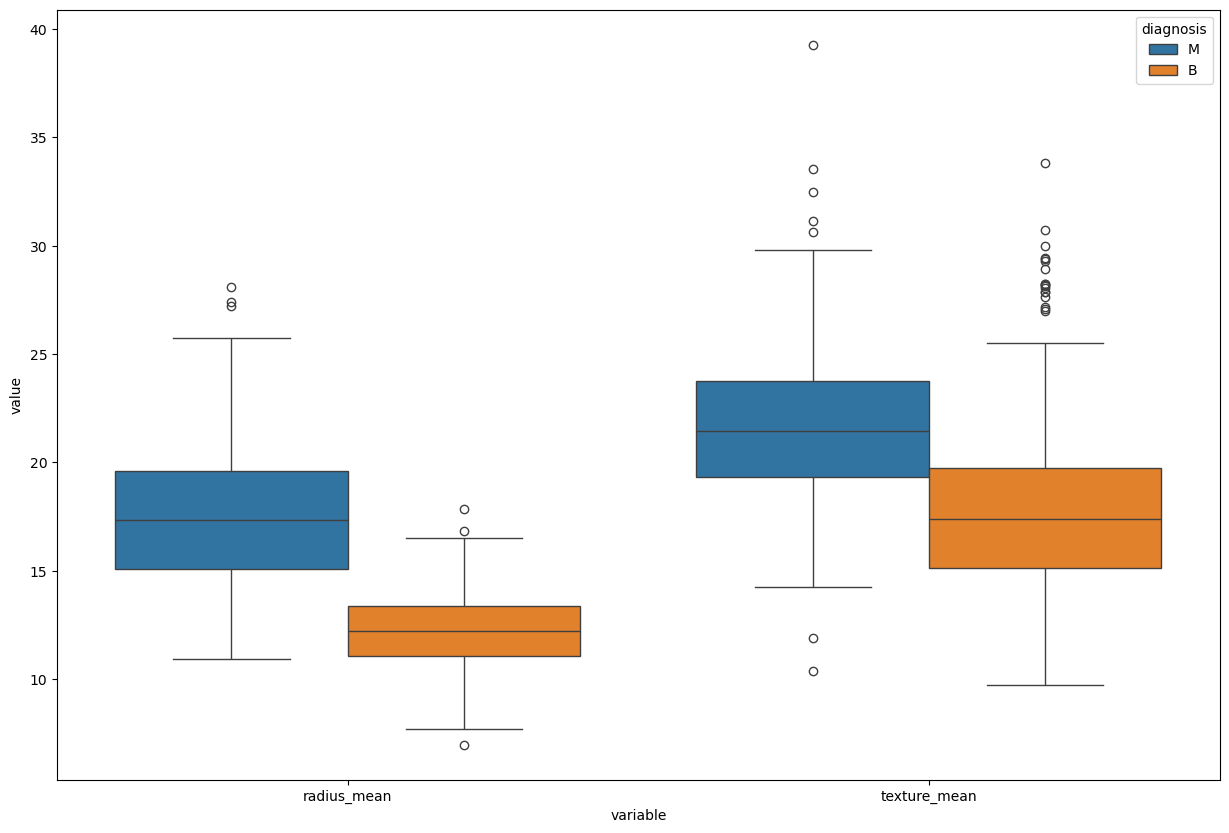

In [15]:
melted_data = pd.melt(data, id_vars = "diagnosis",value_vars = ['radius_mean','texture_mean'])
print(data)
print(melted_data)
plt.figure(figsize= (15,10))
sns.boxplot(x= "variable", y = "value", hue = "diagnosis",data = melted_data)
plt.show()

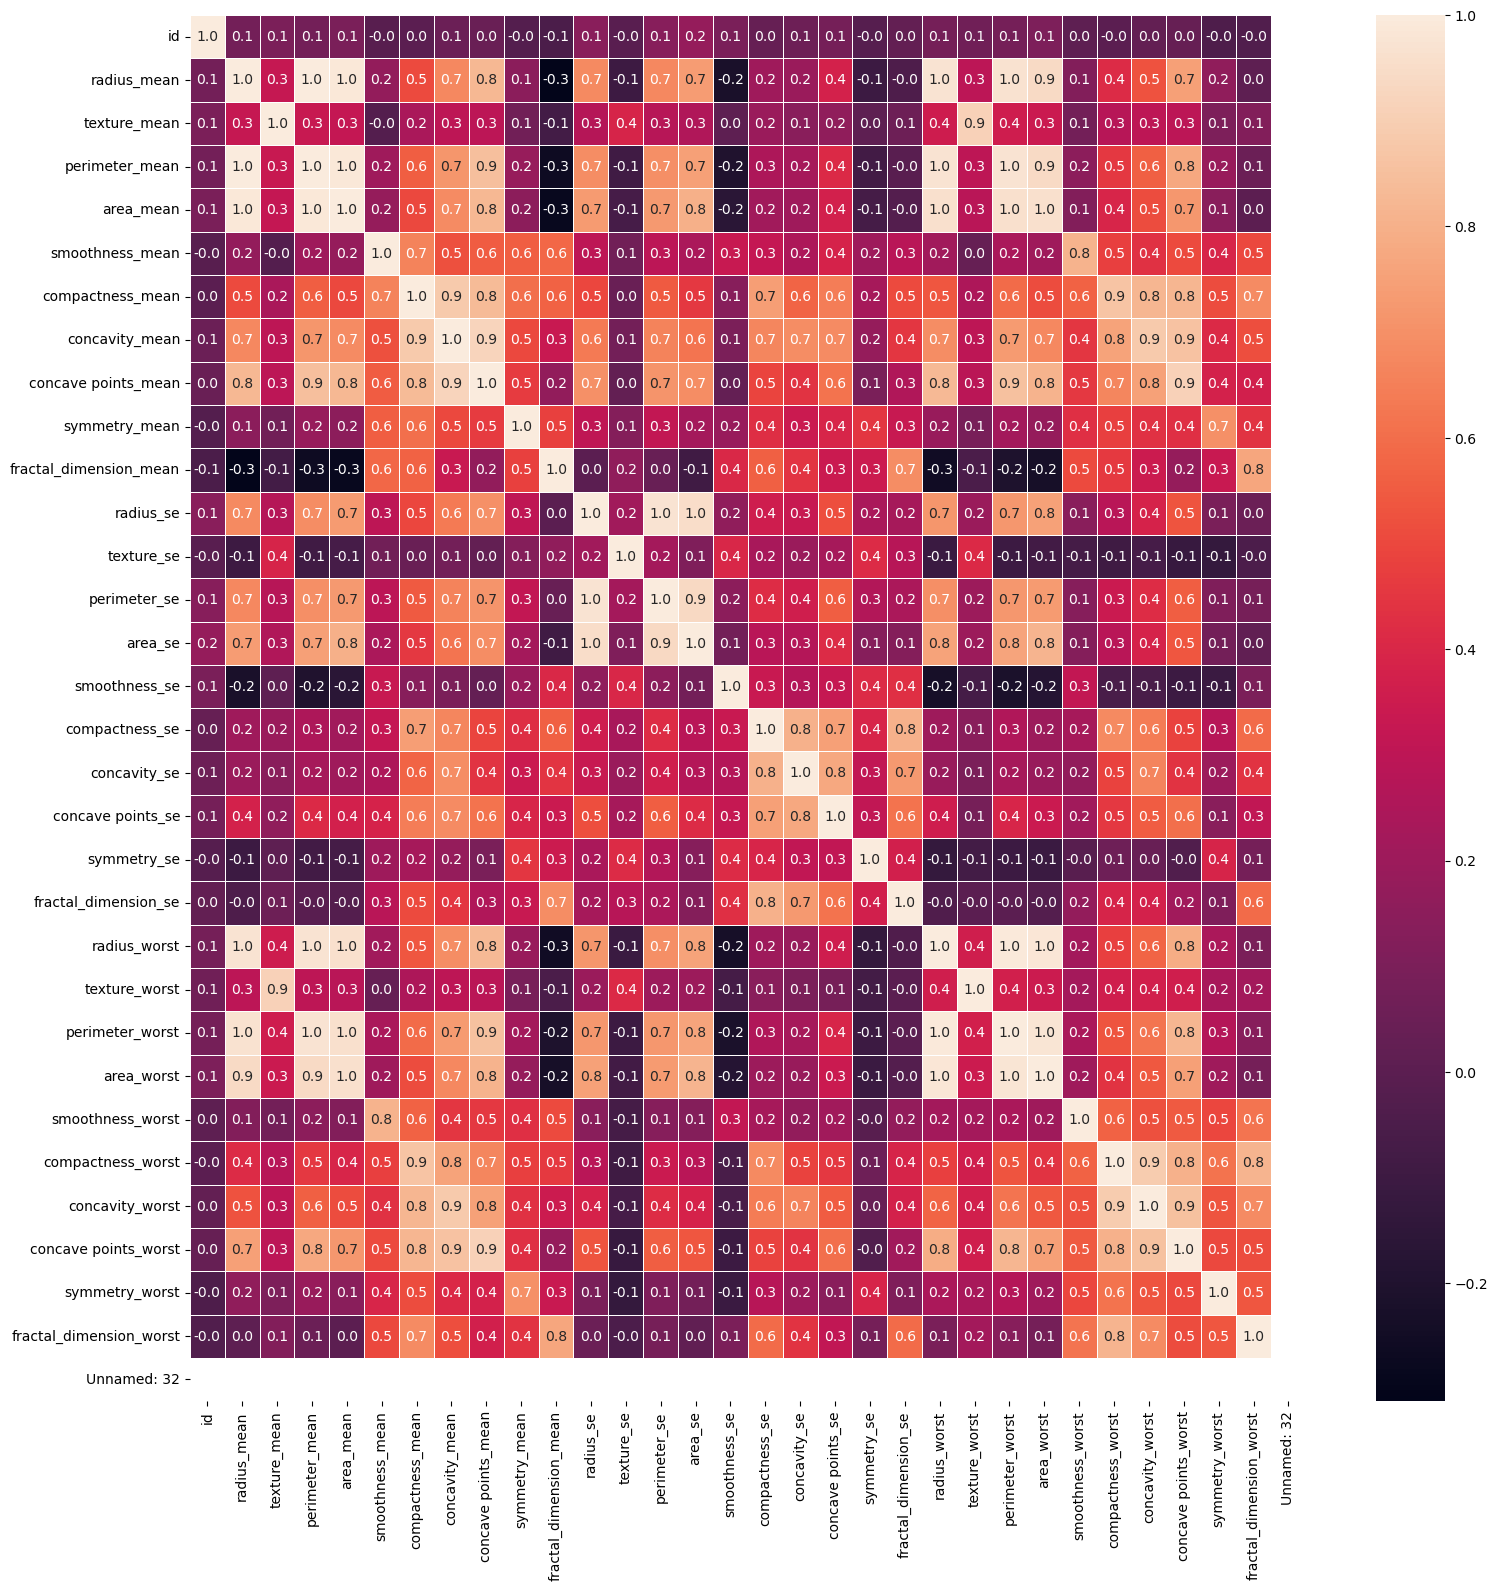

In [17]:
numerical_data = data.select_dtypes(include = ['float64','int64'])

f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(numerical_data.corr(),annot=True, linewidths = 0.5, fmt= ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [18]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print ('Pearson Correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson Correlation:  0.9873571700566128


In [19]:
ranked_data = data.rank()
print (ranked_data)
spearman_corr = ranked_data.loc[:,[ "area_mean","radius_mean"]].corr(method="pearson")
print("Spearman's correlation: ")
print(spearman_corr)

        id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     42.0      463.5        476.5           2.0           492.0      478.0   
1     43.0      463.5        540.0         223.0           528.5      544.0   
2    489.0      463.5        519.0         396.5           517.5      516.0   
3    490.0      463.5        118.0         364.0           173.0      100.0   
4    491.0      463.5        532.0          64.0           539.0      537.0   
..     ...        ...          ...           ...             ...        ...   
564  382.0      463.5        552.0         453.0           550.0      553.0   
565  383.0      463.5        526.0         554.0           524.0      529.0   
566  384.0      463.5        446.0         549.0           442.0      447.0   
567  385.0      463.5        543.0         558.0           547.0      532.0   
568   41.0      179.0          4.0         503.0             2.0        4.0   

     smoothness_mean  compactness_mean  concavity_m

In [21]:
import numpy as np

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
# Muat dataset Breast Cancer Wisconsin
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Lihat beberapa baris dari dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

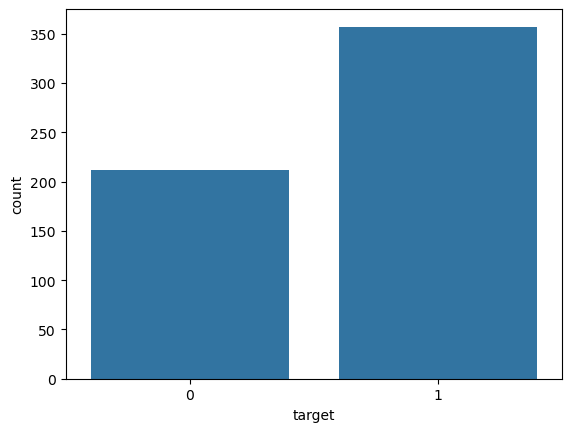

In [24]:
# Lihat informasi umum
print(df.info())
# Hitung statistik deskriptif
print(df.describe())
# Distribusi target (benign vs malignant)
print(df['target'].value_counts())
# Visualisasi distribusi diagnosis (benign=0, malignant=1)
sns.countplot(x='target', data=df)
plt.show()

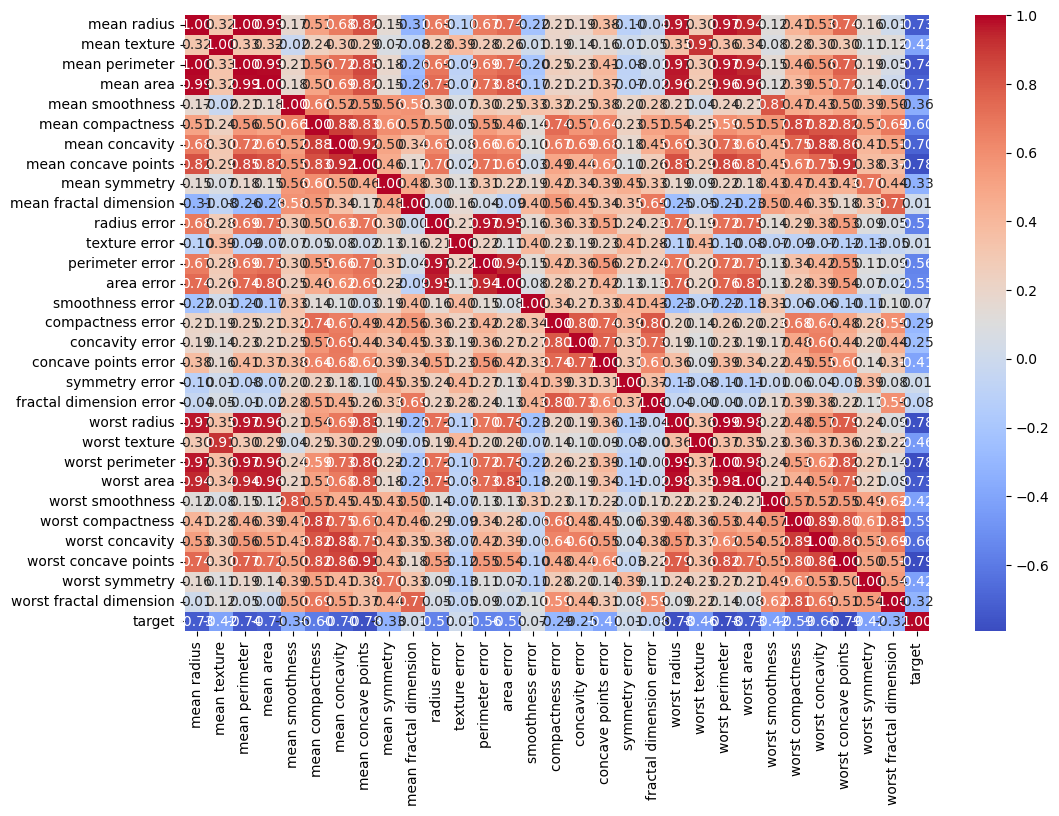

In [25]:
# Korelasi antara fitur
corr_matrix = df.corr()
# Visualisasi korelasi dalam bentuk heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [26]:
# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Inisialisasi model Logistic Regression
model = LogisticRegression()
# Latih model
model.fit(X_train_scaled, y_train)
# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

Accuracy: 0.97


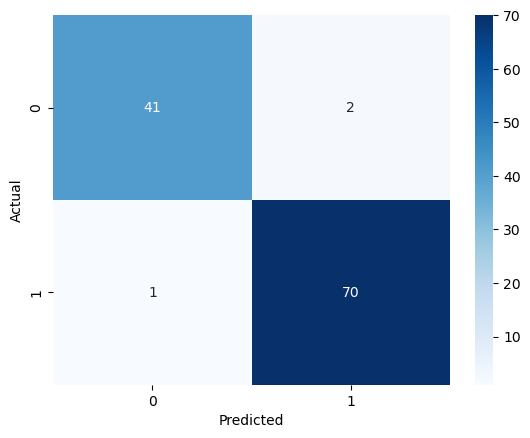

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Matriks confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Laporan klasifikasi
print(classification_report(y_test, y_pred))

In [42]:
# Import libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Memuat data dari file CSV
# Pastikan untuk mengganti 'data.csv' dengan nama file CSV Anda
data = pd.read_csv('data.csv')

# Melihat beberapa baris awal dari data
print(data.head())

# Preprocessing: Memisahkan fitur dan target
# Pastikan untuk mengganti 'target_column' dengan nama kolom target Anda
X = data.drop('radius_mean', axis=1)
y = data['area_mean']

# Encode target jika berupa kategori
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Definisikan model yang akan digunakan
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Menerapkan K-fold Cross-Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Cross-validation untuk Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf)
print("Random Forest Cross-Validation Scores: ", rf_cv_scores)
print("Random Forest Mean CV Score: ", rf_cv_scores.mean())

# Cross-validation untuk SVM
svm_cv_scores = cross_val_score(svm_model, X, y, cv=kf)
print("SVM Cross-Validation Scores: ", svm_cv_scores)
print("SVM Mean CV Score: ", svm_cv_scores.mean())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'M'
